# Project: PV Fault detection

<table>
  <tr>
    <td><img src="logos/CSTB_logo.jpg" width="200" />
    <td><img src="logos/Heliocity_logo.png" width="200" /> 
    <td><img src="logos/USMB_logo_horizontal.png" width="200" />
  </tr>
</table>

<sub>Author: Alexandre MATHIEU, Phd Student, in collaboration Heliocity / CSTB / USMB (LOCIE). </sub>
<sub>Phd thesis: Methodology development to guarantee building photovoltaic systems' performance including failure modelling</sub>

This notebook invites the students to develop some tools to automatically detect faults on PV installation which decreases power production.

It is broken down into two parts:

1. **Power modelling**: Estimation of AC power without faults
2. **Fault detection**: Algorithm development to automatically detect power underperformances

**Make sure to manually execute the cells (ctrl + enter) yourself one by one**

The data has been downloaded from the Scenario S2, Alburquerque USA, of the PVPMC blind comparison, 2021.

**PV system installation data:**

- Location: Albuquerque, USA (Lat 35.05° N , Long 106.54° W , Alt 1600m)
- 12 modules are connected in serie
- Module nominal power: 275 W, datasheet: https://www.tmlenergy.co.id/wp-content/uploads/2019/02/Dymond-CS6K-M-FG-275-280-285-Wp.pdf
- Installation tilt, azimuth: 35° tilt, 180° (South)
- Power temperature coefficient: -0.41 %/°C
- Albedo can be assumed to be equal to 0.2

In [1]:
# Please execute this cell to import packages
import os
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path

# Change the directory path to import functions from local modules
if not 'workbookDir' in globals():
    workbookDir = Path(os.getcwd()).parent
print('Work directory: ' + str(workbookDir))
os.chdir(workbookDir)

from src.config import DATA_PATH # Directory ROOT path
from src.utils.helio_fmt import setup_helio_plt
setup_helio_plt() # set plot format and font

Work directory: C:\Users\MATHIEU\OneDrive - CSTBGroup\Bureau\Code\pvfault_detection_solar_academy


# A. Power modelling

In [2]:
# Load weather data: incident irradiation, direct irradiation, temperature, wind, solar position
input_data = pd.read_csv(DATA_PATH / "project_data" / "project_xtrain.csv", index_col=0) 
input_data.index=  pd.to_datetime(input_data.index)
print(input_data.head(10))

                                  ghi        dhi         dni  temp_air  \
2020-01-01 01:00:00-07:00    0.000000   0.000000    0.000000  0.000000   
2020-01-01 02:00:00-07:00    0.000000   0.000000    0.000000  0.000000   
2020-01-01 03:00:00-07:00    0.000000   0.000000    0.000000  0.000000   
2020-01-01 04:00:00-07:00    0.000000   0.000000    0.000000  0.000000   
2020-01-01 05:00:00-07:00    0.000000   0.000000    0.000000  0.000000   
2020-01-01 06:00:00-07:00    0.000000   0.000000    0.000000  0.000000   
2020-01-01 07:00:00-07:00    0.000000   0.000000    0.000000  0.000000   
2020-01-01 08:00:00-07:00   40.874978  14.742914  264.832939 -4.737162   
2020-01-01 09:00:00-07:00  185.738601  31.546335  754.498236 -3.652383   
2020-01-01 10:00:00-07:00  353.666975  40.138926  914.471581 -0.708700   

                           wind_speed  solar_azimuth  solar_elevation  
2020-01-01 01:00:00-07:00    0.000000      45.887005       -73.699678  
2020-01-01 02:00:00-07:00    0.000000    

Following the naming convention from pvlib: https://pvlib-python.readthedocs.io/en/stable/user_guide/variables_style_rules.html#variables-style-rules

- **ghi**: global horizontal irradiance [W/m2]
- **dhi**: diffuse horizontal irradiance [W/m2]
- **dni**: direct normal irradiance [W/m2]
- **temp_air**: temperature of the air [°C]
- **wind_speed**: wind speed [m/s]
- **solar_azimuth**: azimuth angle of the sun in degrees East of North [°]
- **solar_elevation**: elevation angle of the sun in degrees [°]

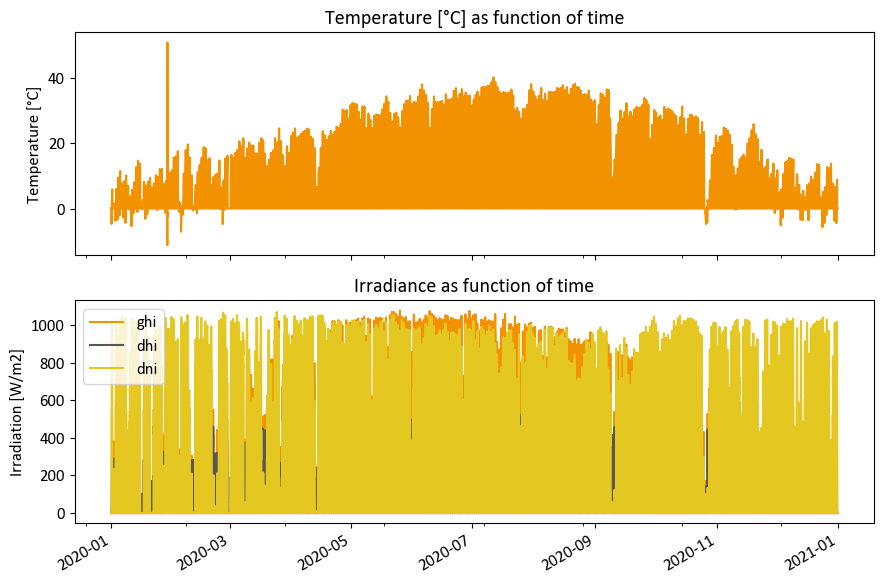

In [17]:
# Make the figure interactive and enable to zoom
%matplotlib widget 
# If the widget does not work, the line below switches to a regular figure
#%matplotlib inline 

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(9,6), sharex=True)
input_data["temp_air"].plot(ax=ax1, title="Temperature [°C] as function of time",ylabel="Temperature [°C]")
meteo_plot = input_data[["ghi","dhi", "dni"]]
meteo_plot.plot(ax=ax2, title="Irradiance as function of time",ylabel="Irradiation [W/m2]")
plt.tight_layout()

### A.1. POA irradiance

In [4]:
# Calculate the POA global irradiance

### A.2. Cell temperature model

In [5]:
# Calculate the cell temperature

### A.3. DC power model

In [6]:
# Calculate the DC power

### 2.4. AC power model

In [7]:
# Calculate the AC power

### 2.5. Calculate the performance metrics

- AC Performance Ratio
- Energy Performance Index

In [8]:
# Load actual data: gpoa, t_mod, pdc, pac
pv_data = pd.read_csv(DATA_PATH / "project_data" / "project_ytrain.csv", index_col=0) 
pv_data.index=  pd.to_datetime(pv_data.index)
print(pv_data.head(10))

                                 gpoa      t_mod          pdc          pac
2020-01-01 01:00:00-07:00    0.000000   0.000000     0.000000          NaN
2020-01-01 02:00:00-07:00    0.000000   0.000000     0.000000          NaN
2020-01-01 03:00:00-07:00    0.000000   0.000000     0.000000          NaN
2020-01-01 04:00:00-07:00    0.000000   0.000000     0.000000          NaN
2020-01-01 05:00:00-07:00    0.000000   0.000000     0.000000          NaN
2020-01-01 06:00:00-07:00    0.000000   0.000000     0.000000          NaN
2020-01-01 07:00:00-07:00    0.000000   0.000000     0.000000          NaN
2020-01-01 08:00:00-07:00   26.273961  -7.719734   262.925954   228.675917
2020-01-01 09:00:00-07:00  442.132104   6.645174  1292.814741  1222.461127
2020-01-01 10:00:00-07:00  701.031595  17.712519  2276.603041  2131.278733


In [1]:
# Calculate the PR at the AC level

In [10]:
# Calculate the EPI

# B. Fault detection

In this section attendees would participate:

1. Develop methods to detect periods with underperformances
2. Quantify the energy losses

## 1. Shading

A fixed-rectangular shading (like a building) obstructs the irradiation to the PV installation.

**Goal**: Identify when shading occurs, flag those periods and quantify the losses.

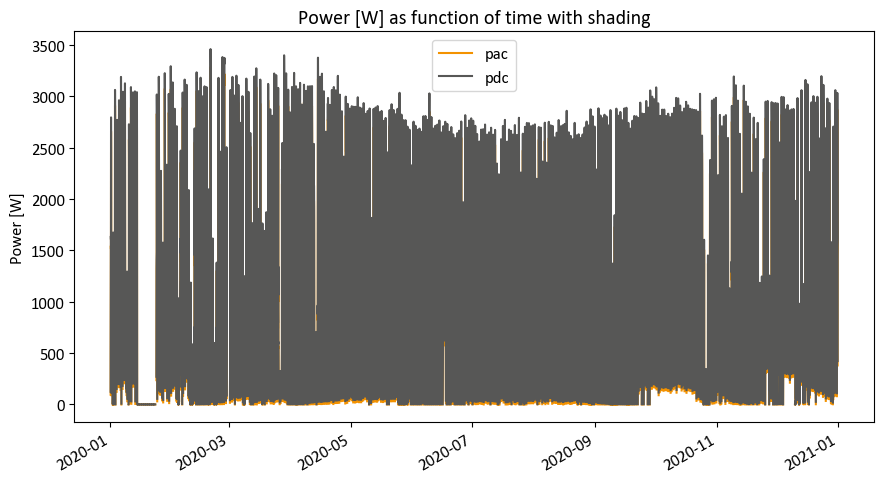

In [18]:
# Import pv data including shading 
pv_data_default = pd.read_csv(DATA_PATH / "project_data" / "project_shading.csv", index_col=0)  
pv_data_default.index = pd.to_datetime(pv_data_default.index) # Convert the index to a datetime index

# Make the figure interactive and enable to zoom
%matplotlib widget 
# If the widget does not work, the line below switches to a regular figure
#%matplotlib inline 

pv_data_default[["pac","pdc"]].plot(title="Power [W] as function of time with shading", ylabel="Power [W]", figsize=(9,5))
plt.tight_layout()

In [12]:
# Develop your detection algorithm

## 2. Inverter clipping

Inverter clipping refers to the maximum production AC limit of the inverter. In that case, the power production caps at a certain limit even if the PV field could produce more.

**Goal**: Identify the AC threshold, flag the periods with inverter clipping and quantify the losses.

Note: The shading fault has been removed from the data and only the clipping has some effects

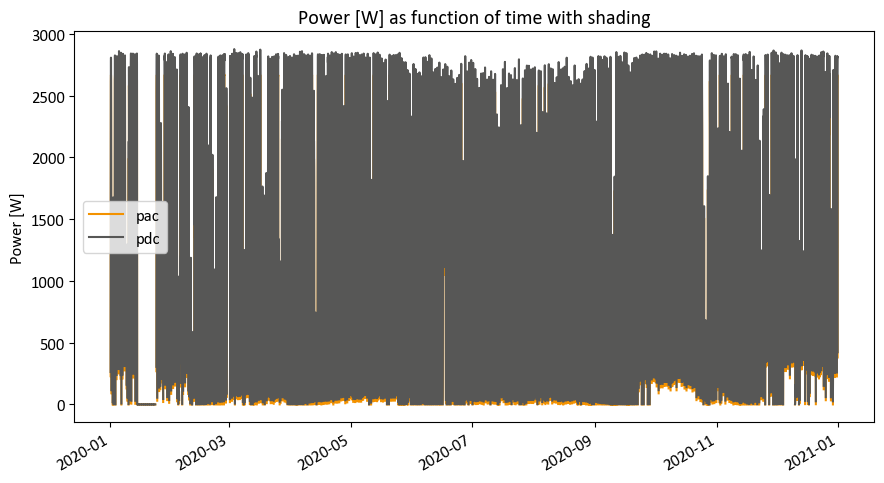

In [19]:
pv_data_default = pd.read_csv(DATA_PATH / "project_data" / "project_clipping.csv", index_col=0)  
pv_data_default.index = pd.to_datetime(pv_data_default.index) # Convert the index to a datetime index

# Make the figure interactive and enable to zoom
%matplotlib widget 
# If the widget does not work, the line below switches to a regular figure
#%matplotlib inline 

pv_data_default[["pac","pdc"]].plot(title="Power [W] as function of time with shading", ylabel="Power [W]", figsize=(9,5))
plt.tight_layout()


In [14]:
# Develop your detection algorithm

## 3. Module short circuit

For the module short-circuit, it can be considered that the meter point is at the PV string level and the string is comprised of 12 modules.

One module in a string gets all its bypass diodes short-circuited.

**Goal**: Identify the date at which the short-circuit occurs and quantify the losses.

Note: The shading and inverter clipping effect have been removed.

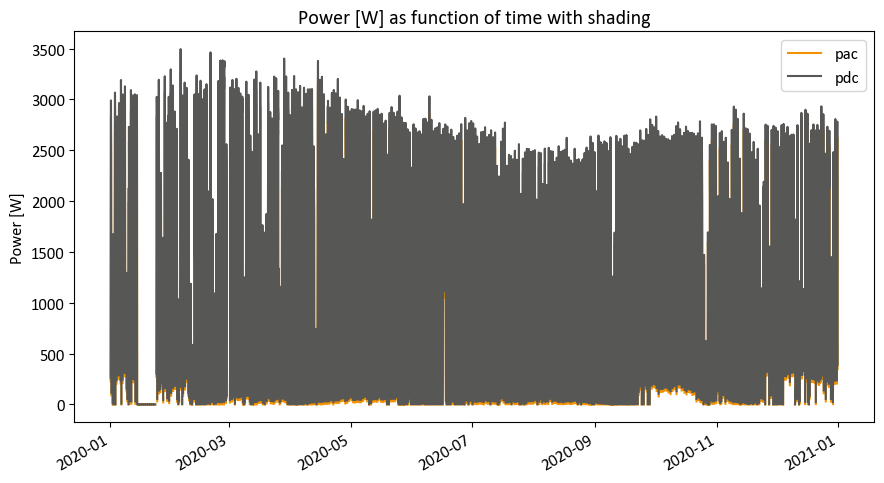

In [20]:
pv_data_default = pd.read_csv(DATA_PATH / "project_data" / "project_sc.csv", index_col=0)  
pv_data_default.index = pd.to_datetime(pv_data_default.index) # Convert the index to a datetime index

# Make the figure interactive and enable to zoom
%matplotlib widget 
# If the widget does not work, the line below switches to a regular figure
#%matplotlib inline 

pv_data_default[["pac","pdc"]].plot(title="Power [W] as function of time with shading", ylabel="Power [W]", figsize=(9,5))
plt.tight_layout()

In [16]:
# Develop your detection algorithm